# Flight Price Pridication - Machine Learning Project

In [1]:
#Importing the basic libearies to understand the data given
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the given data set to notebook
airfare_data = pd.read_excel("airfare.xlsx")
airfare_data

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,27/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,6827
8996,Air India,12/05/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
8997,Jet Airways,15/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,In-flight meal not included,2759
8998,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [3]:
#understanding the columns present in the data set
airfare_cols = list(airfare_data.columns)

In [4]:
#replacing all the column names in upper case to lower case for easy use(habit of typing features in lower case)
airfare_data.rename(columns={'Airline':'airline','Date':'date','Departure Station':'departure_station',
                             'Arrival Station':'arrival_station','Route Map':'route_map',
 'Departure Time':'departure_time',
 'Arrival Time':'arrival_time',
 'Journey Time':'journey_time',
 'Stops':'stops',
 'Extra Info':'extra_info',
 'Price':"price"}, inplace=True)

## Understanding the Given Data

In [5]:
#checking for null values
airfare_data.isna().sum()

airline              0
date                 0
departure_station    0
arrival_station      0
route_map            0
departure_time       0
arrival_time         0
journey_time         0
stops                0
extra_info           0
price                0
dtype: int64

In [6]:
# checking for the data types
airfare_data.dtypes

airline              object
date                 object
departure_station    object
arrival_station      object
route_map            object
departure_time       object
arrival_time         object
journey_time         object
stops                object
extra_info           object
price                 int64
dtype: object

In [7]:
#extracting the date time info from the data set
def dateandtime(x):
    airfare_data[x] = pd.to_datetime(airfare_data[x])
for i in ["date","departure_time", "arrival_time"]:
    dateandtime(i)

In [8]:
airfare_data

,airline,date,departure_station,arrival_station,route_map,departure_time,arrival_time,journey_time,stops,extra_info,price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-12-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-12-25 05:50:00,2021-12-25 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-12-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-12-25 18:05:00,2021-12-25 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-12-25 16:50:00,2021-12-25 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,2019-03-27,Delhi,Cochin,DEL → BLR → COK,2021-12-25 05:05:00,2021-12-25 10:05:00,5h,1 stop,No info,6827
8996,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,2021-12-25 06:20:00,2021-12-25 07:40:00,1h 20m,non-stop,No info,3100
8997,Jet Airways,2019-03-15,Mumbai,Hyderabad,BOM → HYD,2021-12-25 19:35:00,2021-12-25 21:05:00,1h 30m,non-stop,In-flight meal not included,2759
8998,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,2021-12-25 10:55:00,2021-12-25 19:15:00,8h 20m,2 stops,No info,11753


In [9]:
#extracting the journey date and month
airfare_data["journey_day"] = pd.to_datetime(airfare_data.date, format = "%d/%m/%Y").dt.day
airfare_data["journey_month"] = pd.to_datetime(airfare_data.date, format = "%d/%m/%Y").dt.month
airfare_data.drop(["date"], axis =1, inplace=True)

In [10]:
#extracting the journey departure time
airfare_data["dep_hour"] = pd.to_datetime(airfare_data["departure_time"]).dt.hour
airfare_data["dep_min"] = pd.to_datetime(airfare_data["departure_time"]).dt.minute
airfare_data.drop(["departure_time"], axis =1, inplace=True)

In [11]:
#extracting the journey arrival time
airfare_data["arrival_hour"] = pd.to_datetime(airfare_data["arrival_time"]).dt.hour
airfare_data["arrival_min"] = pd.to_datetime(airfare_data["arrival_time"]).dt.minute
airfare_data.drop(["arrival_time"], axis =1, inplace=True)

In [12]:
# UDF to extarct the duration
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins

In [13]:
#extracting the duration data
airfare_data['journey_hours']=airfare_data.journey_time.apply(lambda x:get_duration(x)[0])
airfare_data['journey_minutes']=airfare_data.journey_time.apply(lambda x:get_duration(x)[1])
airfare_data.drop(["journey_time"], axis =1, inplace=True)

In [14]:
airfare_data

,airline,departure_station,arrival_station,route_map,stops,extra_info,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,journey_hours,journey_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,DEL → BLR → COK,1 stop,No info,6827,27,3,5,5,10,5,5,0
8996,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,3100,5,12,6,20,7,40,1,20
8997,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,2759,15,3,19,35,21,5,1,30
8998,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,5,9,10,55,19,15,8,20


In [15]:
airfare_data.dtypes

airline              object
departure_station    object
arrival_station      object
route_map            object
stops                object
extra_info           object
price                 int64
journey_day           int64
journey_month         int64
dep_hour              int64
dep_min               int64
arrival_hour          int64
arrival_min           int64
journey_hours         int64
journey_minutes       int64
dtype: object

In [16]:
#Checking for catrgorical columns
category = [col for col in airfare_data.columns if airfare_data[col].dtype == "O"]
category

['airline',
 'departure_station',
 'arrival_station',
 'route_map',
 'stops',
 'extra_info']

In [17]:
category_col= airfare_data[category]

In [18]:
#Checking for numerical columns
numerical = [col for col in airfare_data.columns if airfare_data[col].dtype != "O"]
numerical
numerical_col= airfare_data[numerical]

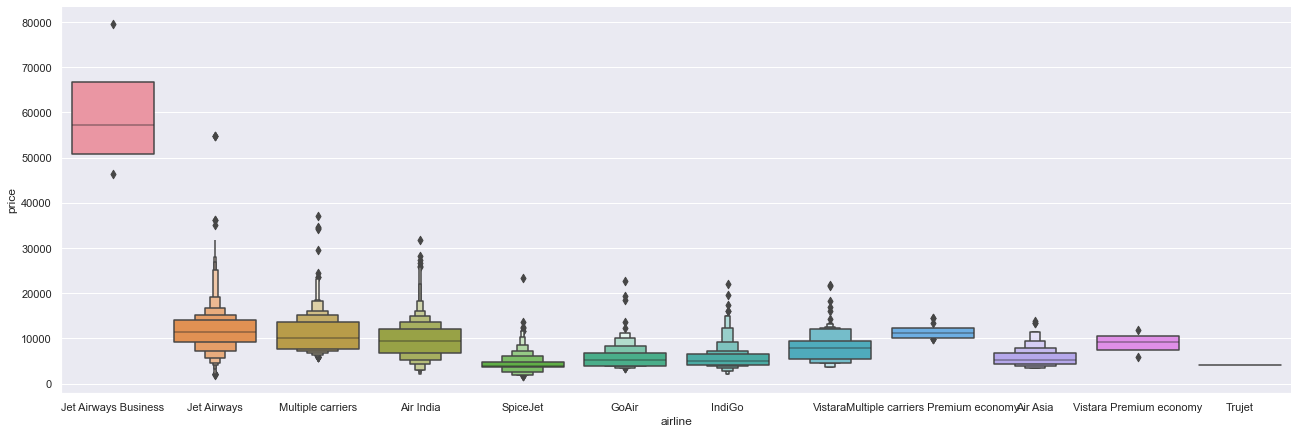

In [19]:
#plot to undersatnd the cat variables
sns.set()
sns.catplot(y = "price", x = "airline", data = airfare_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

We can see that most of the airlines in India as more or less the same price but **Jet Airways Business** and **Jet Airways** has a slightly higher fare.

We need to perfrom encoding on the these categorical variables.

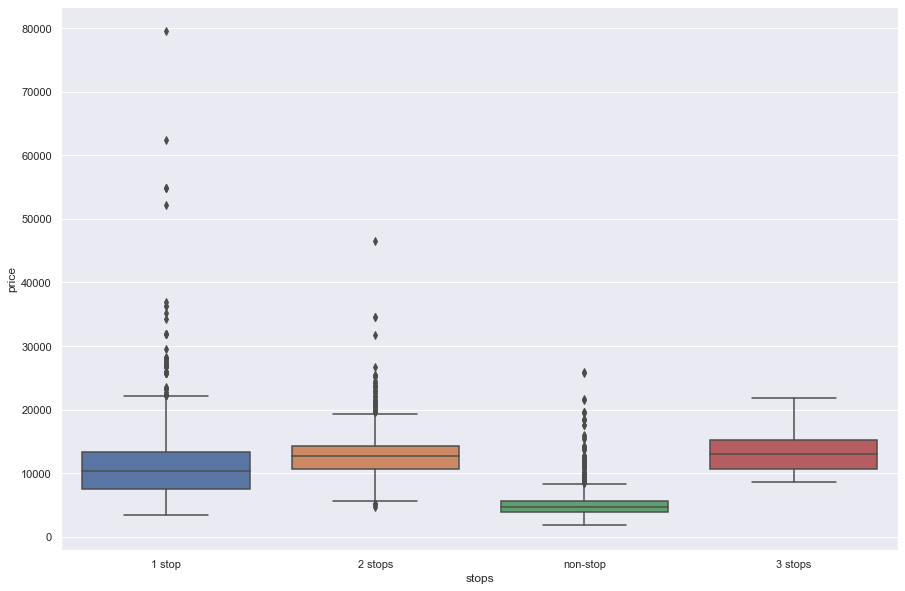

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x="stops", y="price", data=airfare_data.sort_values("price", ascending=False))
plt.show()

In [21]:
#As airline is catg variable, this needs to be encoded
airline = pd.get_dummies(category_col[["airline"]], drop_first= True)
airline

,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,1,0,0,0,0,0,0,0,0
8996,1,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,1,0,0,0,0,0,0,0
8998,1,0,0,0,0,0,0,0,0,0,0


In [22]:
category_col['departure_station'].value_counts()

Delhi       3832
Kolkata     2415
Banglore    1851
Mumbai       582
Chennai      320
Name: departure_station, dtype: int64

<AxesSubplot:xlabel='departure_station', ylabel='price'>

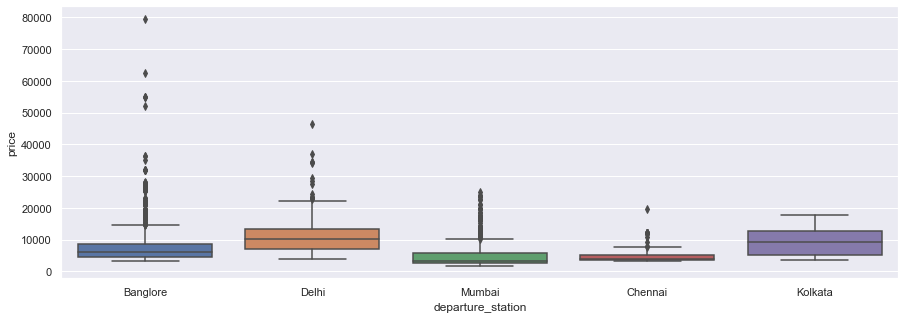

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x='departure_station',y='price',data=airfare_data.sort_values('price',ascending=False))

In [24]:
departure_station = pd.get_dummies(category_col[["departure_station"]], drop_first=True)
departure_station

,departure_station_Chennai,departure_station_Delhi,departure_station_Kolkata,departure_station_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
8995,0,1,0,0
8996,0,0,0,1
8997,0,0,0,1
8998,0,1,0,0


In [25]:
category_col['arrival_station'].value_counts()

Cochin       3832
Banglore     2415
Delhi        1073
New Delhi     778
Hyderabad     582
Kolkata       320
Name: arrival_station, dtype: int64

<AxesSubplot:xlabel='arrival_station', ylabel='price'>

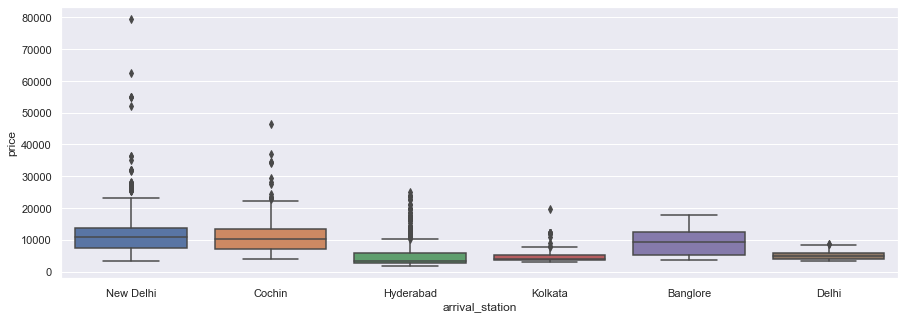

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x='arrival_station',y='price',data=airfare_data.sort_values('price',ascending=False))

In [27]:
arrival_station = pd.get_dummies(category_col[["arrival_station"]], drop_first=True)
arrival_station

,arrival_station_Cochin,arrival_station_Delhi,arrival_station_Hyderabad,arrival_station_Kolkata,arrival_station_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
8995,1,0,0,0,0
8996,0,0,1,0,0
8997,0,0,1,0,0
8998,1,0,0,0,0


In [28]:
# as the route column has multiple categorical and they are split by "→"
category_col["route_1"] = category_col["route_map"].str.split("→").str[0]
category_col["route_2"] = category_col["route_map"].str.split("→").str[1]
category_col["route_3"] = category_col["route_map"].str.split("→").str[2]
category_col["route_4"] = category_col["route_map"].str.split("→").str[3]
category_col["route_5"] = category_col["route_map"].str.split("→").str[4]

<ipython-input-28-6bbdc5c8d6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_col["route_1"] = category_col["route_map"].str.split("→").str[0]
<ipython-input-28-6bbdc5c8d6c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_col["route_2"] = category_col["route_map"].str.split("→").str[1]
<ipython-input-28-6bbdc5c8d6c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [29]:
#drop the route column
category_col.drop(["route_map"], axis =1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
category_col.isna().sum()

airline                 0
departure_station       0
arrival_station         0
stops                   0
extra_info              0
route_1                 0
route_2                 0
route_3              2947
route_4              7700
route_5              8960
dtype: int64

In [31]:
#Since these are extracted values and there can't be more stops hence, filling them with "none"
for i in ["route_3","route_4","route_5"]:
    category_col[i].fillna("none", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
category_col

,airline,departure_station,arrival_station,stops,extra_info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,none,none,none
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,none
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,none
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,none,none
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,none,none
...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,1 stop,No info,DEL,BLR,COK,none,none
8996,Air India,Mumbai,Hyderabad,non-stop,No info,BOM,HYD,none,none,none
8997,Jet Airways,Mumbai,Hyderabad,non-stop,In-flight meal not included,BOM,HYD,none,none,none
8998,Air India,Delhi,Cochin,2 stops,No info,DEL,GOI,BOM,COK,none


In [33]:
#checking for unique values in each categorical variable
for i in category_col.columns:
    print('{} has total {} categories'.format(i,len(category_col[i].value_counts())))

airline has total 12 categories
departure_station has total 5 categories
arrival_station has total 6 categories
stops has total 4 categories
extra_info has total 9 categories
route_1 has total 5 categories
route_2 has total 45 categories
route_3 has total 29 categories
route_4 has total 13 categories
route_5 has total 5 categories


In [34]:
#Perfroming LabelEncoding from the SKLEARN module
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
category_col.columns

Index(['airline', 'departure_station', 'arrival_station', 'stops',
       'extra_info', 'route_1', 'route_2', 'route_3', 'route_4', 'route_5'],
      dtype='object')

In [35]:
for i in [ 'route_1', 'route_2', 'route_3', 'route_4', 'route_5']:
    category_col[i]=encoder.fit_transform(category_col[i])

<ipython-input-35-b1bceb8a1c61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_col[i]=encoder.fit_transform(category_col[i])


In [36]:
category_col.head()

,airline,departure_station,arrival_station,stops,extra_info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,28,12,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,12,4


In [37]:
category_col.drop(["extra_info"], axis =1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
category_col['stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops'], dtype=object)

In [39]:
dict_stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [40]:
category_col['stops']=category_col['stops'].map(dict_stop)

<ipython-input-40-740ce282b0cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_col['stops']=category_col['stops'].map(dict_stop)


In [41]:
category_col

,airline,departure_station,arrival_station,stops,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,0,0,13,28,12,4
1,Air India,Kolkata,Banglore,2,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,1,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,1,3,6,6,12,4
8996,Air India,Mumbai,Hyderabad,0,1,19,28,12,4
8997,Jet Airways,Mumbai,Hyderabad,0,1,19,28,12,4
8998,Air India,Delhi,Cochin,2,3,16,4,5,4


In [42]:
#Joining the cleaned categorical data with the original numerical data.
data_train=pd.concat([category_col,airline,departure_station,arrival_station,airfare_data[numerical]],axis=1)

In [43]:
data_train.columns

Index(['airline', 'departure_station', 'arrival_station', 'stops', 'route_1',
       'route_2', 'route_3', 'route_4', 'route_5', 'airline_Air India',
       'airline_GoAir', 'airline_IndiGo', 'airline_Jet Airways',
       'airline_Jet Airways Business', 'airline_Multiple carriers',
       'airline_Multiple carriers Premium economy', 'airline_SpiceJet',
       'airline_Trujet', 'airline_Vistara', 'airline_Vistara Premium economy',
       'departure_station_Chennai', 'departure_station_Delhi',
       'departure_station_Kolkata', 'departure_station_Mumbai',
       'arrival_station_Cochin', 'arrival_station_Delhi',
       'arrival_station_Hyderabad', 'arrival_station_Kolkata',
       'arrival_station_New Delhi', 'price', 'journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'journey_hours',
       'journey_minutes'],
      dtype='object')

In [44]:
data_train

,airline,departure_station,arrival_station,stops,route_1,route_2,route_3,route_4,route_5,airline_Air India,...,arrival_station_New Delhi,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,journey_hours,journey_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,28,12,4,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,4,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,12,4,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,1,3,6,6,12,4,0,...,0,6827,27,3,5,5,10,5,5,0
8996,Air India,Mumbai,Hyderabad,0,1,19,28,12,4,1,...,0,3100,5,12,6,20,7,40,1,20
8997,Jet Airways,Mumbai,Hyderabad,0,1,19,28,12,4,0,...,0,2759,15,3,19,35,21,5,1,30
8998,Air India,Delhi,Cochin,2,3,16,4,5,4,1,...,0,11753,5,9,10,55,19,15,8,20


In [45]:
data_train.drop(["airline","departure_station","arrival_station"], axis=1,inplace=True)

In [46]:
data_train

,stops,route_1,route_2,route_3,route_4,route_5,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,...,arrival_station_New Delhi,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,journey_hours,journey_minutes
0,0,0,13,28,12,4,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1,3,6,6,12,4,0,0,1,0,...,0,6827,27,3,5,5,10,5,5,0
8996,0,1,19,28,12,4,1,0,0,0,...,0,3100,5,12,6,20,7,40,1,20
8997,0,1,19,28,12,4,0,0,0,1,...,0,2759,15,3,19,35,21,5,1,30
8998,2,3,16,4,5,4,1,0,0,0,...,0,11753,5,9,10,55,19,15,8,20


In [47]:
#UDF for making ploting easy
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


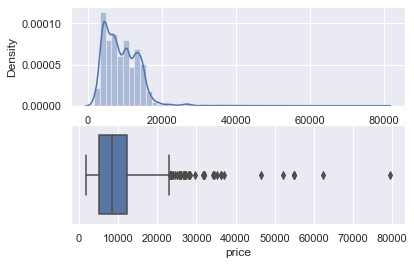

In [48]:
#checking for outliers in the price data as the price of ticket can go high when there is a need for the seat.
plot(data_train,'price')

In [49]:
#Treating the outliers
data_train['price']=np.where(data_train['price']>=40000,data_train['price'].median(),data_train['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


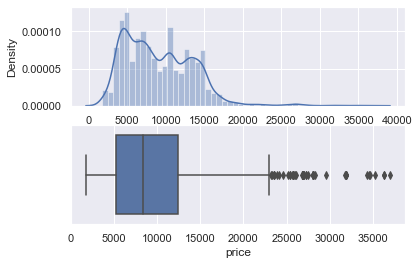

In [50]:
plot(data_train,'price')

## Spliting the data to feed the model

In [51]:
#Creating the "X" part of the data
x=data_train.drop('price',axis=1)
x.head()

,stops,route_1,route_2,route_3,route_4,route_5,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,...,arrival_station_Kolkata,arrival_station_New Delhi,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,journey_hours,journey_minutes
0,0,0,13,28,12,4,0,0,1,0,...,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,...,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,...,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,...,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,...,0,1,3,1,16,50,21,35,4,45


In [52]:
#Creating the predection variable
y=data_train['price']
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
8995     6827.0
8996     3100.0
8997     2759.0
8998    11753.0
8999    12648.0
Name: price, Length: 9000, dtype: float64

In [53]:
#Importing the mutual info calssif. (it basically measures the dependency of features with the target value. 
#The higher score means more dependent variables.)
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)

array([2.3160033 , 2.14695578, 2.89666905, 2.39542788, 1.14569867,
       2.03452771, 0.83480403, 0.08726686, 0.72766534, 0.9719094 ,
       0.00432765, 0.60310032, 0.00884474, 0.32477769, 0.00628316,
       0.2111507 , 0.        , 0.1735364 , 1.65237616, 0.91553507,
       0.30932934, 1.67160808, 0.4142081 , 0.29914579, 0.15637713,
       0.37673068, 1.124284  , 0.89110902, 1.39340958, 1.19899463,
       1.85336365, 1.538031  , 1.80637107, 1.07110732])

In [54]:
important =pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
important

,0
stops,2.278242
route_1,2.152659
route_2,2.879408
route_3,2.407147
route_4,1.176899
route_5,2.031794
airline_Air India,0.795530
airline_GoAir,0.095248
airline_IndiGo,0.710237
airline_Jet Airways,0.985789


In [55]:
#Sorting the variables on dependency_value [Decending (Z to A)]
important.columns=['dependency_value']
important.sort_values(by='dependency_value',ascending=False)

,dependency_value
route_2,2.879408
route_3,2.407147
stops,2.278242
route_1,2.152659
route_5,2.031794
arrival_hour,1.852863
journey_hours,1.778541
arrival_station_Cochin,1.656144
departure_station_Delhi,1.647405
arrival_min,1.526678


In [56]:
#Splitting the cleaned data into train-test split using SKLEARN's train-test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
#UDF to validate the model's performance
from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,predictions))
    print('MSE:',metrics.mean_squared_error(y_test,predictions))
    print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

## Training the data on Regression model

Predictions are: [ 4047.18813104  9906.39361186  5372.52952618 ... 11066.83057203
 11213.76619843 11738.7305275 ]


r2 score is 0.6091202393111268
MAE: 1985.3453308791238
MSE: 7573309.7137802355
RMSE: 44.557214128344285


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


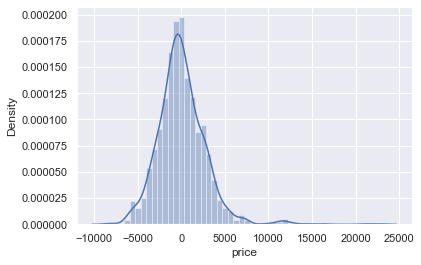

In [58]:
#Using sklearn's LinearRegression model to predict the price.
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

As we can see that the sklearn's LinearRegression model has R2 Score close to 0.6, 
if is good to check if we can improve the model's performace by using any other models

Predictions are: [ 4042.37266667  9333.97866667  3667.893      ... 10760.99
  7245.03933333 11166.3975    ]


r2 score is 0.8212912223921838
MAE: 1131.560719695166
MSE: 3462489.127116356
RMSE: 33.638678923155794


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


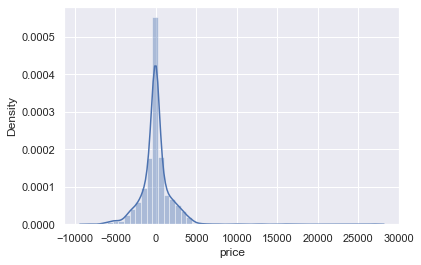

In [59]:
#Lets try the Randomforest Regressor to predect the price. 
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

We can see the RandomForestRegrssor has a much better R2 Score, 
we can train the data on RFR and use this model for prediction.

## Model Optimization

Both GridSerachCV and RandomSerachCV are optimization methods, but due to time constraint, going with RandomSearchCV as it can select the best possible hyper-parameter for he model. 

In [60]:
#Performing the model optimization using RanddomSearchCV
reg_rf= RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]
random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}

In [61]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [62]:
rf_random=RandomizedSearchCV(estimator= reg_rf, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)

In [63]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [64]:
#Picking the best possible hyper-params for optimization of the model
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [65]:
prediction=rf_random.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

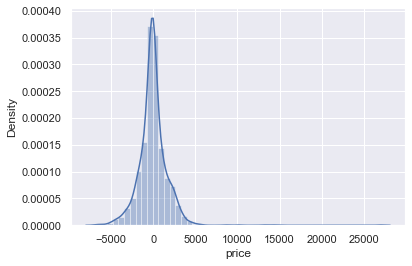

In [66]:
sns.distplot(y_test-prediction)

In [67]:
metrics.r2_score(y_test,prediction)

0.8431635286888132

Using the RandomSearchCV with selecting the most optimized parameters, we were able to improve the performance of the model by 2%

## Saving the model loaclly for future use

In [68]:
local_dest = open("C:\\Users\\adithya\\Documents\M.Tech_ML_1\ml_proj.pkl", "wb")

In [69]:
import pickle
pickle.dump(rf_random,local_dest)

In [70]:
model = open("C:\\Users\\adithya\\Documents\M.Tech_ML_1\ml_proj.pkl", "rb")
r_forest = pickle.load(model)

In [71]:
predictions2=r_forest.predict(x_test)

In [72]:
metrics.r2_score(y_test,predictions2)

0.8431635286888132